In [9]:
from util import *
from sklearn import metrics
from sklearn.linear_model import SGDClassifier as LogisticRegression
from sklearn.model_selection import train_test_split
import sys
import pickle
import os.path

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NUM_DATA_BATCHES = 100
OPTIMAL_ITERS = 100
NUM_ITERS   = 100
NUM_REPEATS = 3

### Testing parameters
opt_reg_param = 0.001
opt_num_runs = 1
opt_eta0 = 1.0

reg_param = 0.005
eta0 = 5.0

num_data_batches = 100
opt_num_iterations = 100
num_iterations = 100

reservoir_size = 500

num_repeats = 3

num_runs = 5

# save filenames
opt_metrics_fname = 'optimal_metrics.pkl'
reservoir_metrics_fname = 'reservoir_metrics.pkl'
model_avg_metrics_fname = 'model_avg_metrics.pkl'

In [10]:
train_data, train_labels = load('trainingVectors.csv')
print(train_data.shape)
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.25)


% pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

(10383, 200)
Populating the interactive namespace from numpy and matplotlib


/home/noah/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
optimal_metrics = pickle.load(open(opt_metrics_fname, 'rb'))
reservoir_metrics = pickle.load(open(reservoir_metrics_fname, 'rb'))
model_avg_metrics = pickle.load(open(model_avg_metrics_fname, 'rb'))

optimal_metrics.calculate_metrics()
reservoir_metrics.calculate_metrics()
model_avg_metrics.calculate_metrics()

In [12]:
labels = ['Baseline', 'Reservoir', 'Model Averaging']
metrics = [optimal_metrics, reservoir_metrics, model_avg_metrics]

def make_plot(ax, metrics, attribute, labels, show_errors=False):
    for metric, label in zip(metrics, labels):
        line, errors = getattr(metric, attribute)
        if not show_errors:
            errors = 0
            
        ax.errorbar(display_indices[:num_data_batches], line[:num_data_batches], yerr=errors, label=label)
        ax.set_xlabel('Data batch index', fontsize=14)
        ax.set_ylabel(attribute[:-5], fontsize=14)
        ax.set_title(attribute[:-5], fontsize=20)
        

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


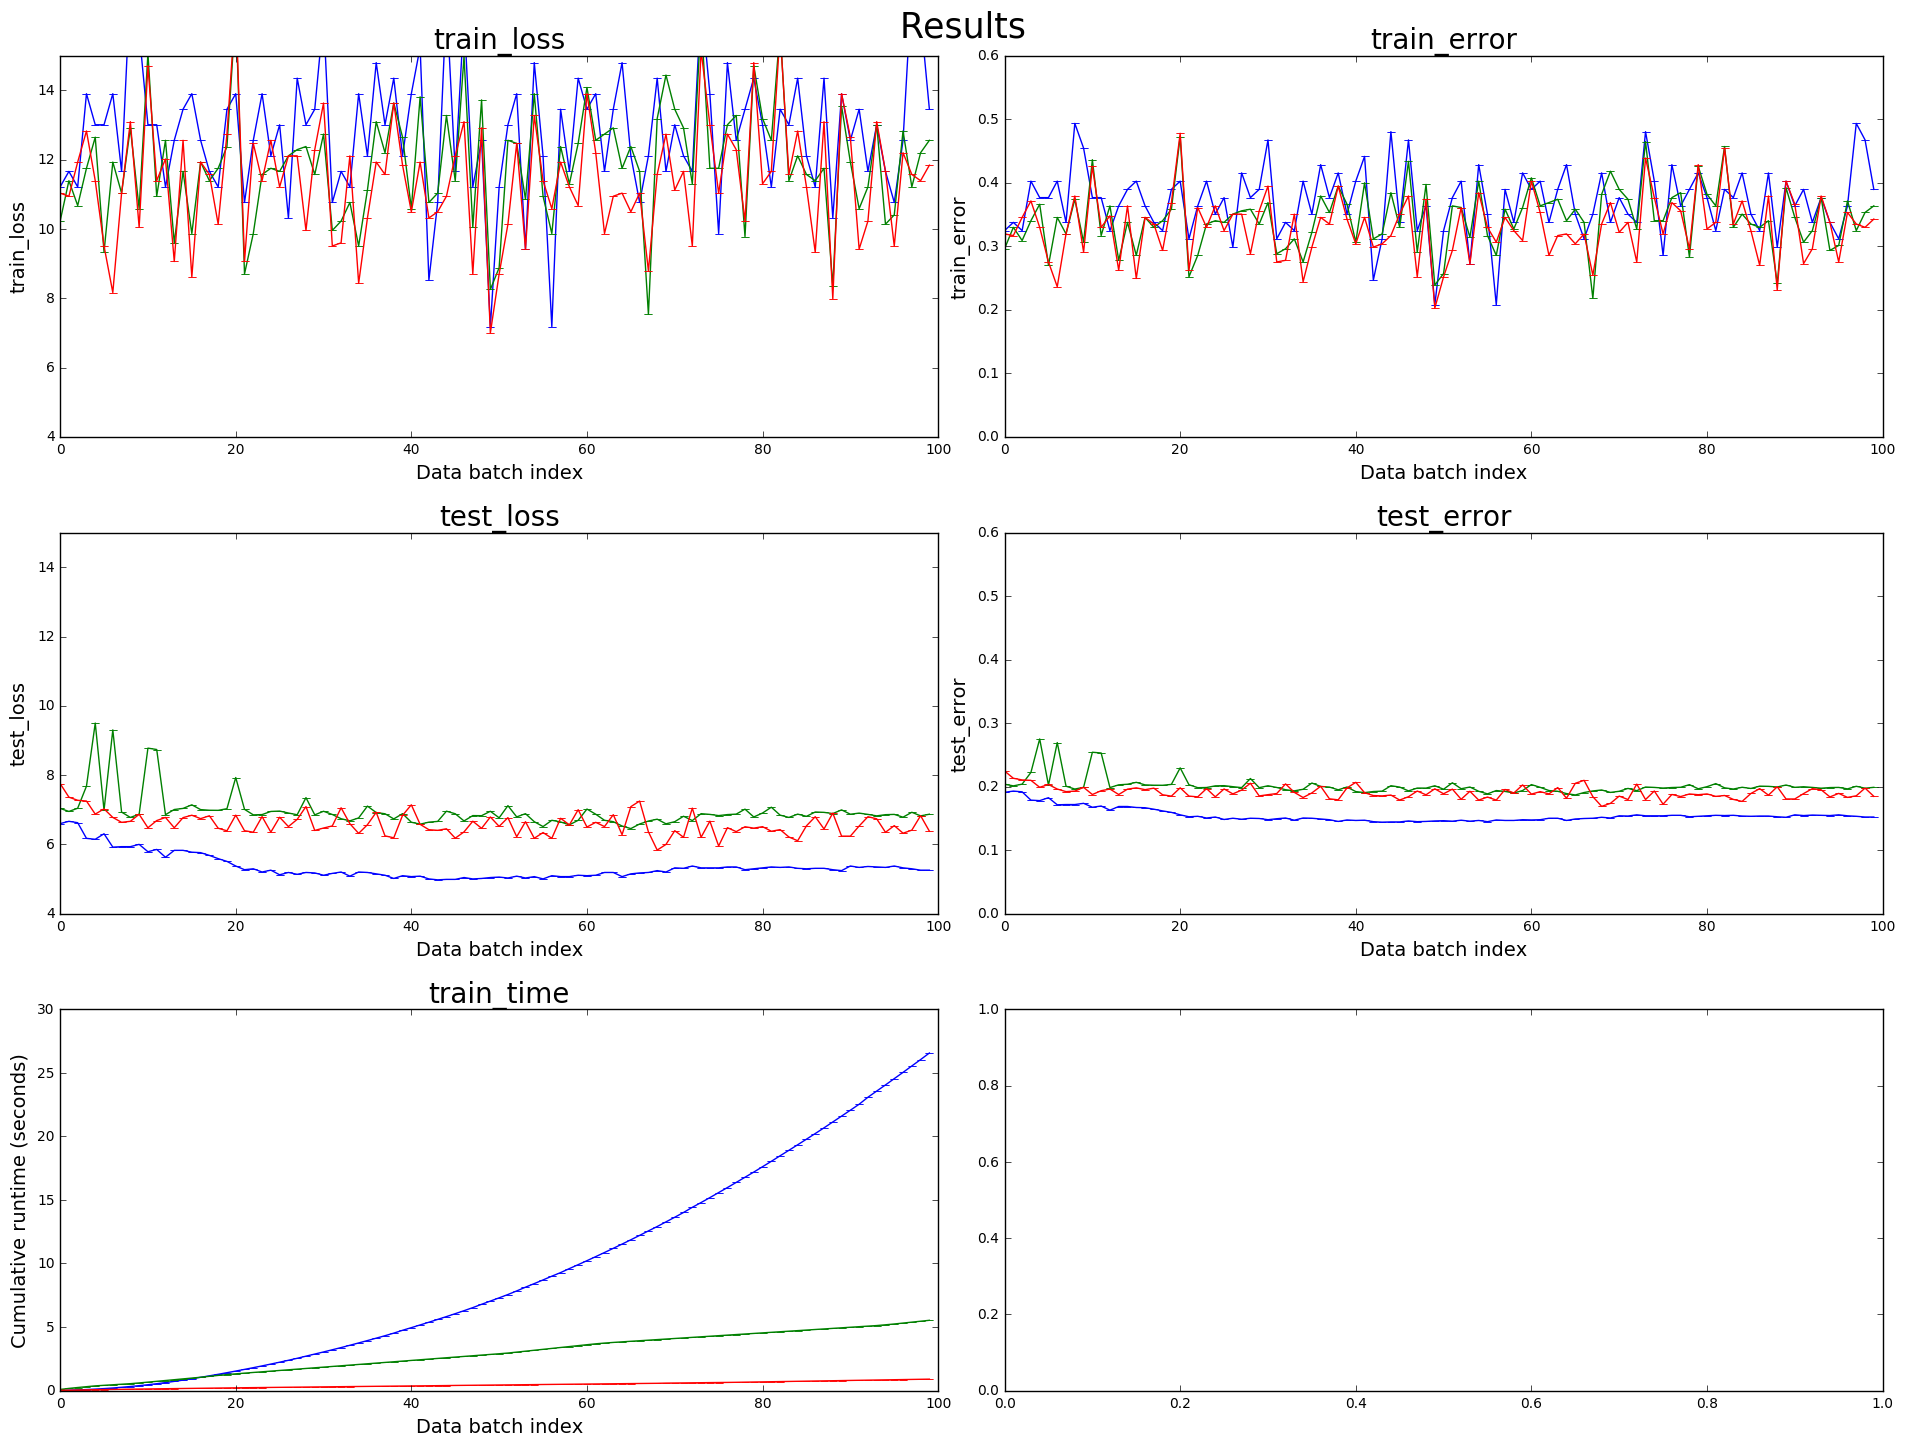

In [13]:
### Plot the different models
display_indices = list(range(num_data_batches * num_repeats))

fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False)

plt.tight_layout(pad=5.0, w_pad=2.0, h_pad=5.0)

labels = ['Baseline', 'Reservoir', 'Model Averaging']
metrics = [optimal_metrics, reservoir_metrics, model_avg_metrics]
        
make_plot(axs[0, 0], metrics, 'train_loss_data', labels)
make_plot(axs[0,1], metrics, 'train_error_data', labels)
make_plot(axs[1,0], metrics, 'test_loss_data', labels)
make_plot(axs[1,1], metrics, 'test_error_data', labels)

make_plot(axs[2, 0], metrics, 'train_time_data', labels)
axs[2,0].set_ylabel('Cumulative runtime (seconds)')

# limit axes
# set the same bounds
axs[0,1].set_ylim([0,0.6])
axs[1,1].set_ylim([0,0.6])
axs[1,0].set_ylim([4,15])
axs[0,0].set_ylim([4,15])

plt.legend(loc='lower center', bbox_to_anchor=(0, 2.5), fontsize=20)
fig.suptitle('Results', fontsize=25)
plt.show()